In [20]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [21]:
def rho_red_light(nx, rho_max, rho_in):
    
    rho = rho_max*numpy.ones(nx)
    rho[0:int(nx-1)*3./4.] = rho_in
    return rho

In [22]:
nx = 81
nt = 30
dx = 4.0/(nx - 1)

rho_in = 5.0
rho_max = 10.0
u_max = 1.0

x = numpy.linspace(0, 4, nx)

rho = rho_red_light(nx, rho_max, rho_in)

/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


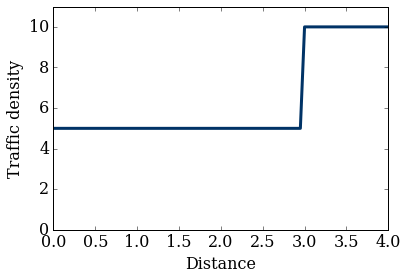

In [23]:
pyplot.plot(x, rho, color='#003366', ls='-',lw=3)
pyplot.ylabel('Traffic density')
pyplot.xlabel('Distance')
pyplot.ylim(0, 11.0);

In [24]:
def computeF(u_max, rho_max, rho):
    
    return u_max*rho*(1-rho/rho_max)

In [25]:
from matplotlib import animation
from IPython.display import HTML

In [26]:
def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

In [27]:
### Try the FTCS method
def ftcs(rho, nt, dt, dx, rho_max, u_max):
    rho_n = 5*numpy.ones((nt, len(rho)))
    rho_n[0,:] = rho.copy()
    for t in range(1, nt):
        F = computeF(u_max, rho_max, rho)
        rho_n[t,1:-1] = rho[1:-1] - dt/dx/2*(F[2:]-F[0:-2])
        rho_n[t,0] = rho[0]
        rho = rho_n[t].copy()
    return rho_n

In [28]:
sigma = 1.
dt = sigma*2*dx
rho_n = ftcs(rho, nt, dt, dx, rho_max, u_max)

/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in subtract


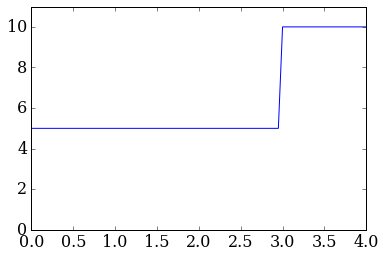

In [32]:
pyplot.plot(x, rho)
pyplot.ylim(0, 11);